# Regresión lineal

Importamos los módulos necesarios:

In [110]:
import numpy as np
from numpy.linalg import * #para determinante matriz
import pandas as pd
from decimal import * #para las cifras significativas
import matplotlib.pyplot as plt

El objetivo es, a partir de un conjunto de N pares de datos almacenados en las magnitudes x e y, determinar los valores de los parámetos a y b que mejor se ajustan a la recta y = b*x +a (mediante el método de mínimos cuadrados). 

Importamos los datos con los que queremos trabajar:

1. Leer un txt:

In [111]:
"""
archivo=input('Archivo de datos: ') 

def readinputdata(filename):
    fichero=open(filename,'r')
    f=[]
    line='0'
    while len(line)>0:
        line=np.array(fichero.readline().split()).astype(float)
        if len(line)>0 :
            f.append(line)
    fichero.close()
    return np.array(f)

data=readinputdata(archivo)

x=data[:,0]
y=data[:,1]
s=data[:,2]
"""

"\narchivo=input('Archivo de datos: ') \n\ndef readinputdata(filename):\n    fichero=open(filename,'r')\n    f=[]\n    line='0'\n    while len(line)>0:\n        line=np.array(fichero.readline().split()).astype(float)\n        if len(line)>0 :\n            f.append(line)\n    fichero.close()\n    return np.array(f)\n\ndata=readinputdata(archivo)\n\nx=data[:,0]\ny=data[:,1]\ns=data[:,2]\n"

2. Leer un Excel:

In [126]:
cdir = 'C:\\Users\\sergi\\OneDrive\\Escritorio\\FÍSICA\\QUINTO\\TÉCNICAS IV\\Sólido\\Efecto Hall\\'  #si da error, probar a poner solo una \ ; dejar las \\ al final
nombre = 'PropagaciónDeIncertidumbres.xlsx' #nombre del archivo
xls = pd.ExcelFile(cdir+nombre)
datos = pd.read_excel(xls, sheet_name= 'Sheet1', header=1, nrows=12) #datos de la hoja de cálculo
y = np.array(datos['Vmed (mV)'],'float') # y ('nombre de la columna')
x = np.array(datos['Ix (mA) (Bz = 0)'],'float') # datos de conteo (x)
sy = np.array(datos['u(Vmed)'],'float') #incertidumbre de la variable dependiente

Definimos una función que realice el ajuste:

In [127]:
def regresionSimple(x,y):
    n=len(x)
    sx=sum(x); sy=sum(y); xx=np.dot(x,x); yy=np.dot(y,y); xy=np.dot(x,y);
    denom=(n*xx - sx**2)
    b=(n*xy - sx*sy)/denom #pendiente
    a=(xx*sy - sx*xy)/denom #ordenada en el origen
    s=np.sqrt(sum((y-a-b*x)**2)/(n-2))
    sa=s*np.sqrt(xx/(n*xx-sx**2)) #incertidumbre de a
    sb=s*np.sqrt(n/(n*xx-sx**2)) #incertidumbre de b
    r=(n*xy-sx*sy)/np.sqrt((n*xx-sx**2)*(n*yy-sy**2)) #coeficiente de regresión lineal
    return [a, b, sa, sb, r]

In [114]:
def regresionPonderada(x,y,s):
    w=1.0/(s*s) #peso estadístico
    wy=sum(w*y); wx=sum(w*x);
    wxx=sum(w*x*x); wxy=sum(w*x*y); wyy=sum(w*y*y)
    sw=sum(w)
    d=det(np.array([[sw, wx],[wx, wxx]]))
    a=(wy*wxx-wx*wxy)/d
    b=(sw*wxy-wx*wy)/d
    sa=np.sqrt(wxx/d); sb=np.sqrt(sw/d)
    r=(sw*wxy-wx*wy)/np.sqrt((sw*wxx-wx**2)*(sw*wyy-wy**2))
    return [a, b, sa, sb, r]

In [129]:
ajuste = regresionSimple(x,y)

Escribimos las cifras significativas correctamente:

In [130]:
a_aux = ajuste[0] #parámetros del ajuste
b_aux = ajuste[1]
sa_aux = ajuste[2]
sb_aux = ajuste[3]
r_aux = ajuste[4]

In [131]:
sa = Decimal('%s' % float('%.2g' % sa_aux)) #incertidumbres con 2 cifras significativas
sb = Decimal('%s' % float('%.2g' % sb_aux))

In [132]:
csa = Decimal(sa) #calculamos el número de decimales (no cifras) significativos de las incertidumbres
csa.as_tuple().exponent
decimales_significativos_a = abs(csa.as_tuple().exponent)

csb = Decimal(sb)
csb.as_tuple().exponent
decimales_significativos_b = abs(csb.as_tuple().exponent)

In [133]:
a = round(a_aux, decimales_significativos_a) #redondeamos el valor medio al número de decimales significativos
b = round(b_aux, decimales_significativos_b)

In [134]:
complementario_r = r_aux**2 - 1 #restamos 1 a R² para ver cuántas cifras diferentes de 9 hay
csr = Decimal('%s' % float('%.g' % complementario_r))
csr.as_tuple().exponent
decimales_significativos_r = abs(csr.as_tuple().exponent)
R2 = round(r_aux**2, decimales_significativos_r)

In [135]:
print('Parámetros del ajuste:')
print('a = ', a,'\u00B1',sa) #\u00B1 es el símbolo ±
print('b = ', b,'\u00B1',sb)
print('R\u00b2= ', R2) #\u00b2 es el ²

Parámetros del ajuste:
a =  -0.0022 ± 0.0077
b =  0.085 ± 0.001
R²=  0.998


### Representación gráfica

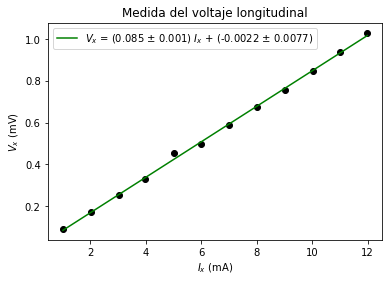

In [137]:
plt.clf()
plt.plot(x, y, 'ko')
#n=len(x); p=[0, n-1]
y_ajuste = a + b * x
plt.plot(x, y_ajuste, 'g-', label='$V_{x}$ = (%g \u00B1 %g) $I_{x}$ + (%g \u00B1 %g)' % (b, sb, a, sa))
plt.title('Medida del voltaje longitudinal')
plt.xlabel('$I_{x}$ (mA)', fontsize=10)
plt.ylabel('$V_{x}$ (mV)', fontsize=10)
plt.xticks(fontsize=10); plt.yticks(fontsize=10)
plt.legend(loc='best', fontsize=10)
#plt.savefig(".pdf", format="pdf")
plt.show()

#plt.xlim(1900 , 2020)
#plt.ylim(0, 0.5)
#plt.annotate('R = 0', (2,0.8))
#plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
#plt.grid(False)
#errorbar(x2, y2, yerr=s2, xerr=0, capsize=1.2, elinewidth=0.4, fmt='b.')
#plt.errorbar(t1 , x1 , capsize=1.2, elinewidth=0.4, fmt='k.')
#errorbar(x2, y2, yerr=s2, xerr=0, capsize=1.2, elinewidth=0.4, fmt='b.')

### Resultados

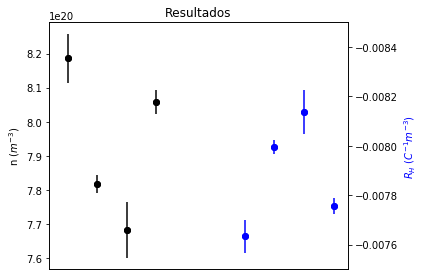

In [124]:
xn = (1, 1.05, 1.1, 1.15)
n = (8.187*(10**20), 7.816*(10**20), 7.681*(10**20), 8.058*(10**20))
sn = (0.072*(10**20), 0.027*(10**20), 0.082*(10**20), 0.034*(10**20))

xR = (1.3, 1.35, 1.4, 1.45)
R = (-7.634*(10**-3), -7.996*(10**-3), -8.137*(10**-3), -7.7567*(10**-3))
sR = (0.067*(10**-3), 0.028*(10**-3), 0.088*(10**-3), 0.031*(10**-3))  
  
fig, ax = plt.subplots() 
plt.title('Resultados')

ax2 = ax.twinx()

ax.scatter(xn, n, color = 'k', label = 'n') 
ax2.scatter(xR, R, color = 'b', label = '$R_{H}$')

ax.errorbar(xn, n, yerr=sn, fmt='ko')
ax2.errorbar(xR, R, yerr=sR, fmt='bo')
  
#ax.set_xlabel('x-axis', color = 'r') 
ax.set_ylabel('n ($m^{-3}$)', color = 'k') 
ax2.set_ylabel('$R_{H}$ ($C^{-1}m^{-3}$)', color = 'b')
ax2.set_ylim([-0.0075, -0.0085])
plt.xticks([]) ; plt.yticks(fontsize=10)
#ax.legend(loc='best')
 
plt.tight_layout()

plt.savefig("resultados.pdf", format="pdf")
  
plt.show()

Este ajuste supone que la incertidumbre de las serie de valores y[i] es la misma. En el caso de que cada punto tenga una incertidumbre determinada, tenemos que usar una regresión lineal ponderada:

In [14]:
"""
def regresionPonderada(x,y,s):
    w=1.0/(s*s) #peso estadístico
    wy=sum(w*y); wx=sum(w*x);
    wxx=sum(w*x*x); wxy=sum(w*x*y); wyy=sum(w*y*y)
    sw=sum(w)
    d=det(array([[sw, wx],[wx, wxx]]))
    a=(wy*wxx-wx*wxy)/d
    b=(sw*wxy-wx*wy)/d
    sa=sqrt(wxx/d); sb=sqrt(sw/d)
    r=(sw*wxy-wx*wy)/sqrt((sw*wxx-wx**2)*(sw*wyy-wy**2))
    return [a, b, sa, sb, r]
"""

'\ndef regresionPonderada(x,y,s):\n    w=1.0/(s*s) #peso estadístico\n    wy=sum(w*y); wx=sum(w*x);\n    wxx=sum(w*x*x); wxy=sum(w*x*y); wyy=sum(w*y*y)\n    sw=sum(w)\n    d=det(array([[sw, wx],[wx, wxx]]))\n    a=(wy*wxx-wx*wxy)/d\n    b=(sw*wxy-wx*wy)/d\n    sa=sqrt(wxx/d); sb=sqrt(sw/d)\n    r=(sw*wxy-wx*wy)/sqrt((sw*wxx-wx**2)*(sw*wyy-wy**2))\n    return [a, b, sa, sb, r]\n'

Si nuestro ajuste no tiene término independiente, solo hay que determinar el parámetro b y su incertidumbre:

In [15]:
"""
def regresionSimpleSenTermoIndependente(x,y):
    n=len(x)
    xy=dot(x,y); xx=dot(x,x); xy=dot(x,y); yy=dot(y,y)
    b=xy/xx
    s=sqrt(sum((y-b*x)**2)/(n-1))
    sb=s/sqrt(xx)
    r=xy/sqrt(xx*yy)
    return [b, sb, r]
"""

'\ndef regresionSimpleSenTermoIndependente(x,y):\n    n=len(x)\n    xy=dot(x,y); xx=dot(x,x); xy=dot(x,y); yy=dot(y,y)\n    b=xy/xx\n    s=sqrt(sum((y-b*x)**2)/(n-1))\n    sb=s/sqrt(xx)\n    r=xy/sqrt(xx*yy)\n    return [b, sb, r]\n'

In [16]:
"""
def regresionPonderadaSenTermoIndependente(x,y,s):
    n=len(x); w=1.0/(s*s); sw=sum(w)
    wxy=sum(w*x*y); wxx=sum(w*x*x); wyy=sum(w*y*y)
    b=wxy/wxx
    s=sqrt(n*sum(w*(y-b*x)**2)/(n-1)/sw)
    sb=1.0/sqrt(wxx)
    r=wxy/sqrt(wxx*wxy)
    return [b, sb, r]
"""

'\ndef regresionPonderadaSenTermoIndependente(x,y,s):\n    n=len(x); w=1.0/(s*s); sw=sum(w)\n    wxy=sum(w*x*y); wxx=sum(w*x*x); wyy=sum(w*y*y)\n    b=wxy/wxx\n    s=sqrt(n*sum(w*(y-b*x)**2)/(n-1)/sw)\n    sb=1.0/sqrt(wxx)\n    r=wxy/sqrt(wxx*wxy)\n    return [b, sb, r]\n'